In [ ]:
#This script uses the weighting potential map and the electric potential map that have been calculated in the prior parts
#of the project to use Ramo's theorem for the calculation of the signal charge and current

In [1]:
import numpy as np
import pandas as pd
import multiprocessing as mp
import matplotlib.pyplot as plt

In [2]:
#load the relevant potentials - notice that, given a structured mesh of control volumes, these potentials are defined at
#the faces of the control volumes - this way a central difference formula can be used to obtain the electric field
#at the control volume centre
#The potential below have been interpolated to the cell faces

#Electric
E_potential_bias = pd.read_csv("interpolated_potential_fully_biased_detector_cell_face_R=1.csv", header = None)
E_potential_superimposed = pd.read_csv("interpolated_superimposed_potential_cell_face.csv", header = None)
E_potential_bias = np.array(E_potential_bias)
E_potential_superimposed = np.array(E_potential_superimposed)
#select the potentials only within the electrodes
E_potential_bias = E_potential_bias[0:3001, :]
E_potential_superimposed = E_potential_superimposed[0:3001, :]
#Total potential with 30V of over-bias
E_potential = np.add(E_potential_bias, 30*E_potential_superimposed)

#Weighting
W_potential = pd.read_csv("W_field_central_strip-reflection_cell_face.csv", header = None)
W_potential = np.array(W_potential)

#define dimension of the domain
N_y_1, N_x_1 = np.shape(E_potential)
N_y_2, N_x_2 = np.shape(W_potential)

print(N_y_1, N_x_1)
print(N_y_2, N_x_2)

3001 1001
3001 3001


In [3]:
#THE TWO CELLS BELOW GENERATE THE FIELD MAPS OUT OF THE POTENTIAL MAPS
#They calculate the gradiets of the potentials using a central difference that uses the potential values at the cell faces

In [ ]:
#define the arrays that will contain the electric field and the weighting field
E_x = np.zeros((N_y_1-1, N_x_1-1))
E_y = np.zeros((N_y_1-1, N_x_1-1))

W_x = np.zeros((N_y_2-1, N_x_2-1))
W_y = np.zeros((N_y_2-1, N_x_2-1))

#mesh size
mesh = 0.1*(10**(-6)) #m

In [ ]:
#x-component of electric field, y-component of electric field
for i in range(N_y_1-1):
    for j in range(N_x_1-1):
        
        #select the relevant potential values surroundig the cell centre depending on the type of interpolation geometry
        #that was used, in this case the potentials of the interpolated map were localised at the 4 corners of the 
        #control volume cell
        W = j     #west
        E = W + 1 #east
        B = i     #top
        T = B + 1 #bottom
        
        V_W_B = E_potential[B, W]
        V_E_B = E_potential[B, E]
        V_W_T = E_potential[T, W]
        V_E_T = E_potential[T, E]
        
        #average
        V_l = (V_W_B + V_W_T)/2
        V_r = (V_E_B + V_E_T)/2
        
        #calculate field
        el_x = -(V_r - V_l)/mesh
        
        V_b = (V_W_B + V_E_B)/2
        V_t = (V_W_T + V_E_T)/2
        
        el_y = -(V_t - V_b)/mesh
        
        E_x[i, j] = el_x
        E_y[i, j] = el_y

#x-component of weighting field, y-component of meighting field
#the same steps described above are carried out also for the weighting potential
for i in range(N_y_2-1):
    for j in range(N_x_2-1):
        
        W = j
        E = W + 1
        B = i
        T = B + 1
        
        W_W_B = W_potential[B, W]
        W_E_B = W_potential[B, E]
        W_W_T = W_potential[T, W]
        W_E_T = W_potential[T, E]
        
        W_l = (W_W_B + W_W_T)/2
        W_r = (W_E_B + W_E_T)/2
        
        wh_x = -(W_r-W_l)/mesh
        
        W_b = (W_W_B + W_E_B)/2
        W_t = (W_W_T + W_E_T)/2
        
        wh_y = -(W_t - W_b)/mesh
        
        W_x[i, j] = wh_x
        W_y[i, j] = wh_y

In [ ]:
#plotting the fields

x_potential = np.arange(0.05, 300.05, 0.1)
y_potential = np.arange(0.05, 100.05, 0.1)

x_strip = np.arange(0.05, 300.05, 0.1)
y_strip = np.arange(0.05, 300.05, 0.1)

X_V, Y_V = np.meshgrid(y_potential, x_potential)
X_W, Y_W = np.meshgrid(y_strip, x_strip)

In [ ]:
print(np.shape(E_x))
print(np.shape(E_y))
print(np.shape(X_V))
print(np.shape(Y_V))

fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.streamplot(X_V, Y_V, E_x, E_y, density = 2)
ax.contour(X_V, Y_V, E_potential[0:3000, 0:1000])
ax.set_xlabel("x (microns)")
ax.set_ylabel("y (microns)")
ax.set_title("Electric field in detector, V_applied = 30V")
#plt.savefig("E_field_detector_V_app=30V.jpeg")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.streamplot(X_W, Y_W, W_x, W_y, density = 2)
#ax.contour(X_W, Y_W, W_potential[0:3000, 0:3000], 100)
ax.set_xlabel("x (microns``
ax.set_ylabel("y (microns)")
ax.set_title("Weighting field due to left strip")
#plt.savefig("W_field_left_strip.jpeg")

#NOTICE THAT THIS POTENTIAL/FIELD CAN BE USED TO MODEL THE SIGNAL GENERATED BY THE TWO STIPS RIGHT NEXT TO THE CENTRAL
#STRIP

In [4]:
#THE GROUP OF CELLS BELOW COMPUTE THE SIGNAL IN THE CASE OF FULL DEPLETION - e and h have well defined velocity at all
#locations

#INDUCED CURRENT SIGNAL

In [ ]:
#NEED TO IN TURN OPEN ALL THE CONCENTRATION FILES
#ELECTRONS

#select the region of interest for the components of the weighting field
W_x_interest = W_x[:, 1750:2750]
W_y_interest = W_y[:, 1750:2750]

#must be expressed in SI units
mob_e = 1350*10**(-4)
#area element
A = (0.1)**2 #microns^2
#sign of charge carrier
charge_carrier = -1

#max concentration
rho_0 = 3342*1.6019*10**(-19)   #microns^-2 (charge density)
                                #for 7000 e-h pairs produced as a globule of radius 1 micron

#define arrays for the induced current and the time
signal_e = []
time_series_e = []

num_files = 3064 #number of concentration files
time_step = 0.002 #ns

for i in range(num_files):
    #load all files in turn
    time = (i+1)*time_step
    str_time = str("%.3f" % time) #num of sig. fig. depends on the velocity of charge collection
    title = "concentration_e_" + str_time + "ns.csv"
    
    concentration = pd.read_csv(title, header = None)
    concentration = np.array(concentration)
    N = len(concentration)
    
    #extract start and end
    end = int(concentration[N-1, 0])
    start = int(concentration[N-2, 0])
    
    #define the start and end i and j indeces of the matrix from the start end cells numbers and the size of the
    #solution domain in the FVM calculation
    j_start = int(int(start)%int(N_x_1-1))
    j_end = int(int(end)%int(N_x_1-1))
    i_start = int(int(start - j_start)/int(N_x_1-1))
    i_end= int(int(end - j_end)/int(N_x_1-1))
    
    #restrict the concentration vector to just the concentration values
    concentration = concentration[0:N-2, 0]
    
    location = 0
    induced_current = 0
    #appy Ramo's theorem to all control volumes
    for i in range(i_start, i_end+1):
        #special treatment for the start and end i-indeces
        if i == i_start:
            for j in range(j_start, N_x_1-1):
                
                charge = A*concentration[location]*rho_0 #total charge
                vel_x = mob_e*E_x[i, j]*charge_carrier #velocity in x at CV-centre
                vel_y = mob_e*E_y[i, j]*charge_carrier #velocity in y at CV-centre
                wh_x = W_x_interest[i, j] #x-component of weighting field at CV-centre
                wh_y = W_y_interest[i, j] #y-component of weighting field at CV-centre
                
                i_sig = charge*(vel_x*wh_x + vel_y*wh_y)*(-charge_carrier) #apply Ramo's formula for signal charge
                
                induced_current = induced_current + i_sig #add it to total signal from all CVs

                location = location + 1
        elif i == i_end:
            for j in range(0, j_end):
                
                charge = A*concentration[location]*rho_0
                vel_x = mob_e*E_x[i, j]*charge_carrier
                vel_y = mob_e*E_y[i, j]*charge_carrier
                wh_x = W_x_interest[i, j]
                wh_y = W_y_interest[i, j]
                
                i_sig = charge*(vel_x*wh_x + vel_y*wh_y)*(-charge_carrier)
                
                induced_current = induced_current + i_sig

                location = location + 1
        else:
            for j in range(N_x_1-1):
                
                charge = A*concentration[location]*rho_0
                vel_x = mob_e*E_x[i, j]*charge_carrier
                vel_y = mob_e*E_y[i, j]*charge_carrier
                wh_x = W_x_interest[i, j]
                wh_y = W_y_interest[i, j]
                
                i_sig = charge*(vel_x*wh_x + vel_y*wh_y)*(-charge_carrier)
                
                induced_current = induced_current + i_sig

                location = location + 1
        
    signal_e.append(induced_current) #append to signal vector
    time_series_e.append(round(time, 3)) #adjust the number of sig fig

In [ ]:
#NEED TO IN TURN OPEN ALL THE CONCENTRATION FILES
#HOLES
#The same comments above are valid here, the only difference are the physical parameters of the charge carrier

W_x_interest = W_x[:, 2000:3000]
W_y_interest = W_y[:, 2000:3000]

#must be expressed in proper units
mob_h = 450*10**(-4)
#area element
A = (0.1)**2 #microns^2
#sign of charge carrier
charge_carrier = 1

#max concentration
rho_0 = 3342*1.6019*10**(-19)   #microns^-2 (charge density)
                                #for 7000 e-h pairs produced as a globule of radius 1 micron

signal_h = []
time_series_h = []

num_files = 2791 #number of concentration files
time_step = 0.006 #ns

for i in range(num_files): 
    time = (i+1)*time_step
    str_time = str("%.3f" % time) #num of sig. fig. depends on the velocity of charge collection
    title = "concentration_h_" + str_time + "ns.csv"
    
    concentration = pd.read_csv(title, header = None)
    concentration = np.array(concentration)
    N = len(concentration)
    
    #extract start and end
    end = int(concentration[N-1, 0])
    start = int(concentration[N-2, 0])
    
    j_start = int(int(start)%int(N_x_1-1))
    j_end = int(int(end)%int(N_x_1-1))
    i_start = int(int(start - j_start)/int(N_x_1-1))
    i_end= int(int(end - j_end)/int(N_x_1-1))
    
    concentration = concentration[0:N-2, 0]
    
    location = 0
    induced_current = 0
    for i in range(i_start, i_end+1):
        if i == i_start:
            for j in range(j_start, N_x_1-1):
                
                charge = A*concentration[location]*rho_0
                vel_x = mob_h*E_x[i, j]*charge_carrier
                vel_y = mob_h*E_y[i, j]*charge_carrier
                wh_x = W_x_interest[i, j]
                wh_y = W_y_interest[i, j]
                
                i_sig = charge*(vel_x*wh_x + vel_y*wh_y)*(-charge_carrier)
                
                induced_current = induced_current + i_sig

                location = location + 1
        elif i == i_end:
            for j in range(0, j_end):
                
                charge = A*concentration[location]*rho_0
                vel_x = mob_h*E_x[i, j]*charge_carrier
                vel_y = mob_h*E_y[i, j]*charge_carrier
                wh_x = W_x_interest[i, j]
                wh_y = W_y_interest[i, j]
                
                i_sig = charge*(vel_x*wh_x + vel_y*wh_y)*(-charge_carrier)
                
                induced_current = induced_current + i_sig

                location = location + 1
        else:
            for j in range(N_x_1-1):
                
                charge = A*concentration[location]*rho_0
                vel_x = mob_h*E_x[i, j]*charge_carrier
                vel_y = mob_h*E_y[i, j]*charge_carrier
                wh_x = W_x_interest[i, j]
                wh_y = W_y_interest[i, j]
                
                i_sig = charge*(vel_x*wh_x + vel_y*wh_y)*(-charge_carrier)
                
                induced_current = induced_current + i_sig

                location = location + 1
        
    signal_h.append(induced_current)
    time_series_h.append(round(time, 3)) #adjust the number of sig fig

In [ ]:
#save signals

signalVStime_e = [time_series_e, signal_e]
signalVStime_h = [time_series_h, signal_h]

signalVStime_e = np.array(signalVStime_e)
signalVStime_h = np.array(signalVStime_h)

np.savetxt("electron_signal_x=?_y=?.csv", signalVStime_e, delimiter = ",")
np.savetxt("hole_signal_x=?_y=?.csv", signalVStime_h, delimiter = ",")

In [6]:
#THE GROUP OF CELLS BELOW COMPUTE THE INDUCED CHARGE AS A FUNCTION OF TIME - needed when the velocity is not well defined
#everywhere in the solution domain

#INDUCED CHARGE SIGNAL

In [7]:
#load weighting potential at the cell centre of the CVs

W_potential = pd.read_csv("W_field_central_strip-reflection.csv", header = None)
W_potential = np.array(W_potential)
print(np.shape(W_potential))

(3000, 3000)


Text(0.5, 1.0, 'Weighting field due to left strip')

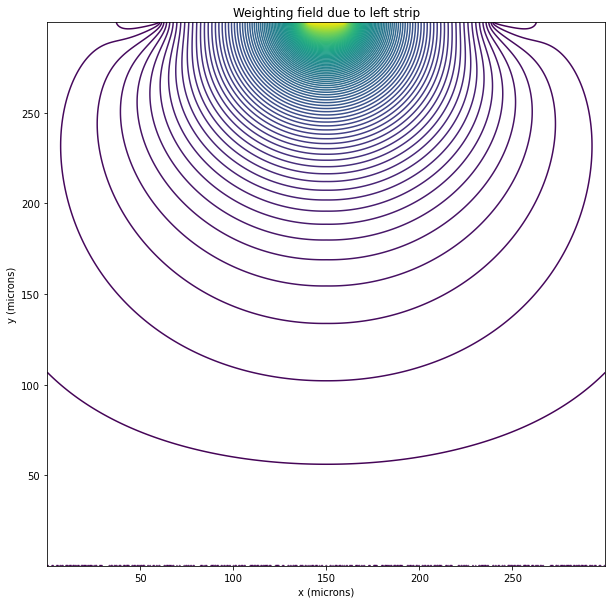

In [8]:
#plot the potential

x_strip = np.arange(0.05, 300.05, 0.1)
y_strip = np.arange(0.05, 300.05, 0.1)
X_W, Y_W = np.meshgrid(y_strip, x_strip)

fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.contour(X_W, Y_W, W_potential[0:3000, 0:3000], 100)
ax.set_xlabel("x (microns)")
ax.set_ylabel("y (microns)")
ax.set_title("Weighting field due to left strip")

In [10]:
#holes

#select the region of interest of the weighting potential
W_potential_interest = W_potential[:, 1000:2000]

#area element
A = (0.1)**2 #microns^2
#sign of charge carrier
charge_carrier = 1

#max concentration
rho_0 = 3342*1.6019*10**(-19)   #microns^-2 (charge density)
                                #for 7000 e-h pairs produced as a globule of radius 1 micron

#0th time-step
Q_0 = 0

#concentration distribution from at time t = 0
concentration_0 = pd.read_csv("concentration_0_plane.csv", header = None) #assume it is defined on a plane
concentration_0 = np.array(concentration_0)

for i in range(3000):
    for j in range(1000): #numbers from size of FVM domain assuming mesh size 0.1, height = 300, width = 100
        
        q_0 = concentration_0[i, j]*rho_0*W_potential_interest[i, j]*A*charge_carrier #add up the contribution from all CVs
        Q_0 = Q_0 + q_0
#The method emploied here is a simple Riemann sum approximation of the integral

#define the vector of charge and the time vector
signal_h = [Q_0] 
time_series_h = [0]

num_files = 1232 #number of concentration files
time_step = 0.006 #ns

for i in range(num_files):
    #load all files in turn
    time = (i+1)*time_step
    str_time = str("%.3f" % time) #num of sig. fig. depends on the velocity of charge collection
    title = "concentration_h_" + str_time + "ns.csv"
    
    concentration = pd.read_csv(title, header = None)
    concentration = np.array(concentration)
    N = len(concentration)
    
    #extract start and end
    end = int(concentration[N-1, 0])
    start = int(concentration[N-2, 0])
    
    #define the start and end i and j indeces of the matrix from the start end cells numbers and the size of the
    #solution domain in the FVM calculation
    j_start = int(int(start)%int(N_x_1-1))
    j_end = int(int(end)%int(N_x_1-1))
    i_start = int(int(start - j_start)/int(N_x_1-1))
    i_end= int(int(end - j_end)/int(N_x_1-1))
    
    #restrict the concentration vector to just the concentration values
    concentration = concentration[0:N-2, 0]
    
    location = 0
    Q_t = 0
    for i in range(i_start, i_end+1):
        #apply the same Riemann sum approximation to the integral
        if i == i_start:
            for j in range(j_start, N_x_1-1):
                
                q_t = concentration[location]*rho_0*A*charge_carrier*W_potential_interest[i, j]
                Q_t = Q_t + q_t
                
                location = location + 1
        elif i == i_end:
            for j in range(0, j_end):
                
                q_t = concentration[location]*rho_0*A*charge_carrier*W_potential_interest[i, j]
                Q_t = Q_t + q_t
                
                location = location + 1
        else:
            for j in range(N_x_1-1):
                
                q_t = concentration[location]*rho_0*A*charge_carrier*W_potential_interest[i, j]
                Q_t = Q_t + q_t
                
                location = location + 1
        
    signal_h.append(Q_t) #accumulated charge at time t
    time_series_h.append(round(time, 3)) #adjust the number of sig fig

In [ ]:
#Same comments as above are valid here, different physical parameters

#electrons

W_potential_interest = W_potential[:, 2000:3000]

#area element
A = (0.1)**2 #microns^2
#sign of charge carrier
charge_carrier = -1

#max concentration
rho_0 = 3342*1.6019*10**(-19)   #microns^-2 (charge density)
                                #for 7000 e-h pairs produced as a globule of radius 1 micron

#0th time-step
Q_0 = 0

#concentration distribution from at time t = 0
concentration_0 = pd.read_csv("concentration_0_plane.csv", header = None)
concentration_0 = np.array(concentration_0)

for i in range(3000):
    for j in range(1000): #from domain size
        
        q_0 = concentration_0[i, j]*rho_0*W_potential_interest[i, j]*A*charge_carrier
        Q_0 = Q_0 + q_0
    
signal_e = [Q_0] 
time_series_e = [0]

num_files = 1359 #number of concentration files
time_step = 0.006#ns

for i in range(num_files): 
    time = (i+1)*time_step
    str_time = str("%.3f" % time) #num of sig. fig. depends on the velocity of charge collection
    title = "concentration_e_0.006_" + str_time + "ns.csv"
    
    concentration = pd.read_csv(title, header = None)
    concentration = np.array(concentration)
    N = len(concentration)
    
    #extract start and end
    end = int(concentration[N-1, 0])
    start = int(concentration[N-2, 0])
    
    j_start = int(int(start)%int(N_x_1-1))
    j_end = int(int(end)%int(N_x_1-1))
    i_start = int(int(start - j_start)/int(N_x_1-1))
    i_end= int(int(end - j_end)/int(N_x_1-1))
    
    concentration = concentration[0:N-2, 0]
    
    location = 0
    Q_t = 0
    for i in range(i_start, i_end+1):
        if i == i_start:
            for j in range(j_start, N_x_1-1):
                
                q_t = concentration[location]*rho_0*A*charge_carrier*W_potential_interest[i, j]
                Q_t = Q_t + q_t
                
                location = location + 1
        elif i == i_end:
            for j in range(0, j_end):
                
                q_t = concentration[location]*rho_0*A*charge_carrier*W_potential_interest[i, j]
                Q_t = Q_t + q_t
                
                location = location + 1
        else:
            for j in range(N_x_1-1):
                
                q_t = concentration[location]*rho_0*A*charge_carrier*W_potential_interest[i, j]
                Q_t = Q_t + q_t
                
                location = location + 1
        
    signal_e.append(Q_t) #accumulated charge at time t
    time_series_e.append(round(time, 3)) #adjust the number of sig fig

In [11]:
#save files
signalVStime_e = [time_series_e, signal_e]
signalVStime_h = [time_series_h, signal_h]

signalVStime_e = np.array(signalVStime_e)
signalVStime_h = np.array(signalVStime_h)

np.savetxt("electron_net_charge_x=?_y=?.csv", signalVStime_e, delimiter = ",")
np.savetxt("hole_net_charge_x=?_y=?.csv", signalVStime_h, delimiter = ",")